## Домашняя работа по базовой математической статистике для Data scientist

Задания со зведочкой не обязательны для зачета.

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import kurtosis
from scipy.stats import skew
from scipy import stats

df = pd.read_csv("bikeshare.csv")
del df['datetime']

### 1.
Постройте гистограмму распределения каждой из метрик в датасете при помощи метода датафрейма `hist()`. При необходимости добавьте логарифмированную ось (параметр log).

Text(0.5, 1.0, 'Гистограмма распределения')

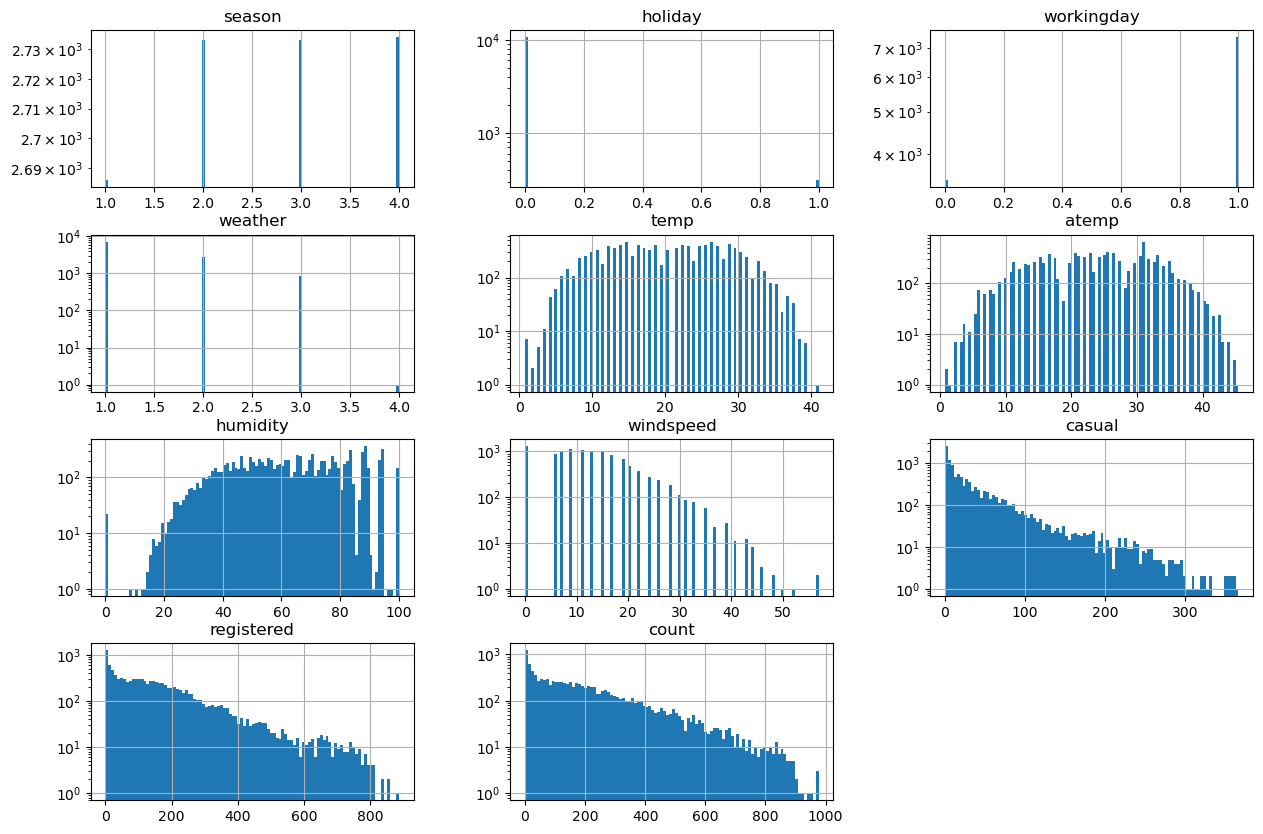

In [23]:
### YOUR CODE HERE ###
df.hist(bins = 100, figsize=(15,10), log = True)
plt.title('Гистограмма распределения')

### 2.
Для каждой метрики найдите среднее, дисперсию, 50, 75 и 99 перцентили, моду. Какие выводы о наличии аномалий мы можем сделать?

In [31]:
### YOUR CODE HERE ###
df.mean()

season          2.506614
holiday         0.028569
workingday      0.680875
weather         1.418427
temp           20.230860
atemp          23.655084
humidity       61.886460
windspeed      12.799395
casual         36.021955
registered    155.552177
count         191.574132
dtype: float64

In [33]:
df.var()

season            1.245845
holiday           0.027755
workingday        0.217304
weather           0.401751
temp             60.708872
atemp            71.818856
humidity        370.371306
windspeed        66.659670
casual         2496.049219
registered    22812.789514
count         32813.313153
dtype: float64

In [37]:
np.percentile(df, 50)

12.3

In [39]:
np.percentile(df, 75)

37.88

In [41]:
np.percentile(df, 99)

504.0

In [43]:
df.value_counts().nlargest(10)

season  holiday  workingday  weather  temp   atemp   humidity  windspeed  casual  registered  count
4       0        1           1        8.20   12.880  80        0.0000     0       4           4        2
2       0        1           1        22.96  26.515  83        6.0032     0       6           6        2
1       0        1           1        10.66  14.395  65        6.0032     0       1           1        2
                                             15.150  65        0.0000     0       1           1        2
                                      12.30  16.665  61        0.0000     0       4           4        2
                             2        5.74   8.335   63        7.0015     0       1           1        2
                 0           1        10.66  12.880  60        15.0013    0       1           1        2
                                      16.40  20.455  15        22.0028    0       3           3        2
                 1           1        4.92   7.575   54     

### 3. (*) 
 Для каждой метрики проанализируйте ассиметрию и смещенность распределения – для этого посчитайте для каждой метрики коэффициент ассиметрии и эксцесса.

In [45]:
### YOUR CODE HERE ###
kurtosis(df)


array([-1.35558995, 30.03262442, -1.39773698,  0.39480008, -0.91466138,
       -0.85023637, -0.76001971,  0.62929237,  7.54761013,  2.62432387,
        1.29894477])

In [47]:
skew(df)

array([-7.07469530e-03,  5.65973713e+00, -7.76056069e-01,  1.24331267e+00,
        3.69033584e-03, -1.02545381e-01, -8.63232869e-02,  5.88685396e-01,
        2.49540449e+00,  1.52459447e+00,  1.24189506e+00])

### 4.

Постройте симметричный доверительный интервал для метрики с самой большой дисперсией при доверительной вероятности 0.95. 

In [49]:
### YOUR CODE HERE ###
def my_norm_confidence(df=df, column = "atemp", alpha = 0.95):
    interval = stats.norm.interval(alpha, loc=df[column].mean(), scale=df[column].std())
    return interval
confidence = my_norm_confidence()
print(confidence)

(7.045172041641042, 40.26499606418295)


Text(0.5, 1.0, 'Доверительный интервал')

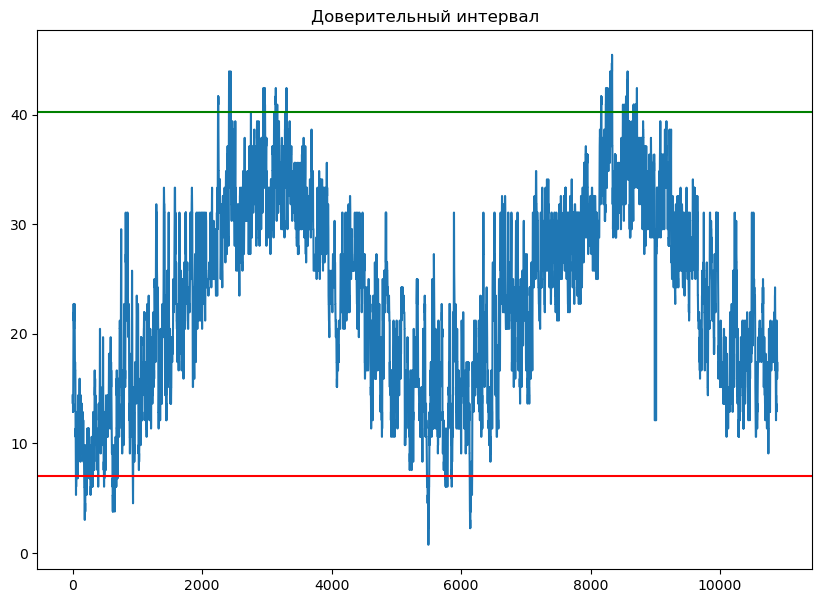

In [51]:
df.atemp.plot()
plt.axhline(y=confidence[1], color="g", linestyle="-")
plt.axhline(y=confidence[0], color="r", linestyle="-")
plt.title("Доверительный интервал")

### 5. (*)

Найдите количество значений, выходящих за три сигмы для каждой из метрик. Где получилось больше всего аномалий?

In [53]:
### YOUR CODE HERE ###

def find_anomaly(df, column):
    upper_level = df[column].mean() + 3*df[column].std()
    lower_level = df[column].mean() - 3*df[column].std()
    anomaly = df[(df[column] >= upper_level)&(df[column] >= lower_level)]
    return anomaly,upper_level,lower_level

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      10886 non-null  int64  
 1   holiday     10886 non-null  int64  
 2   workingday  10886 non-null  int64  
 3   weather     10886 non-null  int64  
 4   temp        10886 non-null  float64
 5   atemp       10886 non-null  float64
 6   humidity    10886 non-null  int64  
 7   windspeed   10886 non-null  float64
 8   casual      10886 non-null  int64  
 9   registered  10886 non-null  int64  
 10  count       10886 non-null  int64  
dtypes: float64(3), int64(8)
memory usage: 935.6 KB


In [63]:
metrics = ['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count']

for metric in metrics:
    anomaly = find_anomaly(df=df, column=metric)
    count_anomalies = len(anomaly[0]) if isinstance(anomaly, tuple) else len(anomaly)
    print(f'Количество аномалий в метрике {metric}: {count_anomalies}')

Количество аномалий в метрике season: 0
Количество аномалий в метрике holiday: 311
Количество аномалий в метрике workingday: 0
Количество аномалий в метрике weather: 1
Количество аномалий в метрике temp: 0
Количество аномалий в метрике atemp: 0
Количество аномалий в метрике humidity: 0
Количество аномалий в метрике windspeed: 67
Количество аномалий в метрике casual: 292
Количество аномалий в метрике registered: 235
Количество аномалий в метрике count: 147


### 6.

Постройте корреляционную матрицу и heatmap по метрикам. Какие выводы о наличии связей можно сделать?

In [67]:
### YOUR CODE HERE ###

research_list = ["season", "holiday", "workingday", "weather", "temp", "atemp", "humidity", "windspeed", "casual", "registered", "count"]
df[research_list].head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [69]:
corr_m = df[research_list].corr()
corr_m

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
season,1.000000,0.029368,-0.008126,0.008879,0.258689,0.264744,0.190610,-0.147121,0.096758,0.164011,0.163439
holiday,0.029368,1.000000,-0.250491,-0.007074,0.000295,-0.005215,0.001929,0.008409,0.043799,-0.020956,-0.005393
workingday,-0.008126,-0.250491,1.000000,0.033772,0.029966,0.024660,-0.010880,0.013373,-0.319111,0.119460,0.011594
weather,0.008879,-0.007074,0.033772,1.000000,-0.055035,-0.055376,0.406244,0.007261,-0.135918,-0.109340,-0.128655
temp,0.258689,0.000295,0.029966,-0.055035,1.000000,0.984948,-0.064949,-0.017852,0.467097,0.318571,0.394454
atemp,0.264744,-0.005215,0.024660,-0.055376,0.984948,1.000000,-0.043536,-0.057473,0.462067,0.314635,0.389784
humidity,0.190610,0.001929,-0.010880,0.406244,-0.064949,-0.043536,1.000000,-0.318607,-0.348187,-0.265458,-0.317371
windspeed,-0.147121,0.008409,0.013373,0.007261,-0.017852,-0.057473,-0.318607,1.000000,0.092276,0.091052,0.101369
casual,0.096758,0.043799,-0.319111,-0.135918,0.467097,0.462067,-0.348187,0.092276,1.000000,0.497250,0.690414
registered,0.164011,-0.020956,0.119460,-0.109340,0.318571,0.314635,-0.265458,0.091052,0.497250,1.000000,0.970948


<Axes: >

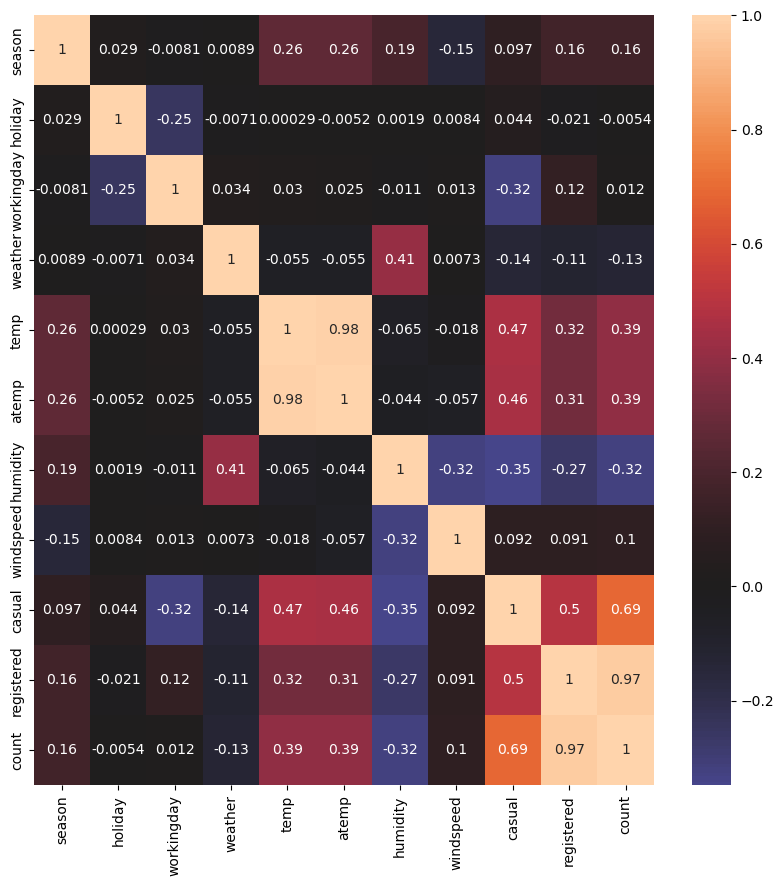

In [71]:
plt.figure(figsize=(10,10))
sns.heatmap(corr_m, center=0, annot=True)